In [1]:
from modules import * 
from modules.utils import *

In [2]:
X_train, X_test, y_train, y_test, scaler = load_and_preprocess_data(
    filename='Loan_Default_Cleaned.csv',
    target_column='Status'
)

In [5]:
def train_random_forest(X_train, y_train, X_test, y_test, handle_imbalance=None):
    
    if handle_imbalance == 'balanced':
        model = RandomForestClassifier(class_weight='balanced')
        imbalance_label = "Class Weights"
        print("Using balanced class weights for Random Forest.")
    
    elif handle_imbalance == 'smote':
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        model = RandomForestClassifier()
        X_train, y_train = X_train_resampled, y_train_resampled
        imbalance_label = "SMOTE"
        print("Using SMOTE for class imbalance in Random Forest.")
    
    else:
        model = RandomForestClassifier()
        imbalance_label = "No Weights"
        print("Training Random Forest without handling class imbalance.")
    
    
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]
    

    plot_confusion_matrix(y_test, y_pred, y_probs, model_name=f'Random Forest ({imbalance_label})')
    plot_roc_curve(y_test, y_probs, model_name=f'Random Forest ({imbalance_label})')
    
    return model, y_pred, y_probs


Training Random Forest without handling class imbalance.


<Figure size 640x480 with 0 Axes>

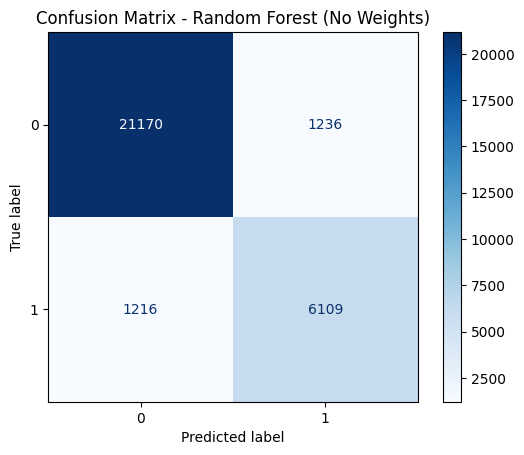

Random Forest (No Weights) Metrics:
Accuracy: 0.9175
Precision: 0.8317
Recall: 0.8340
F1 Score: 0.8329
ROC-AUC Score: 0.9784


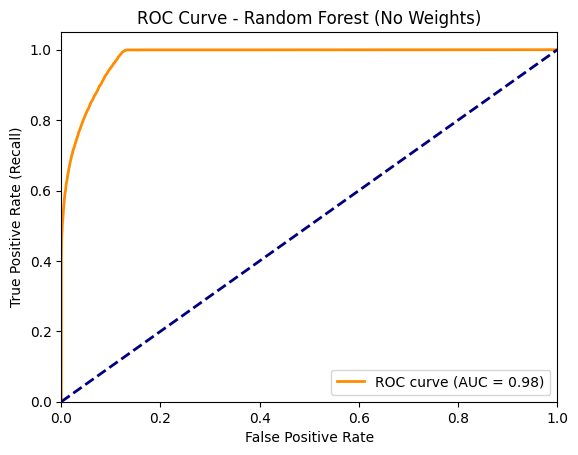

Random Forest (No Weights) ROC-AUC Score: 0.98
Using balanced class weights for Random Forest.


<Figure size 640x480 with 0 Axes>

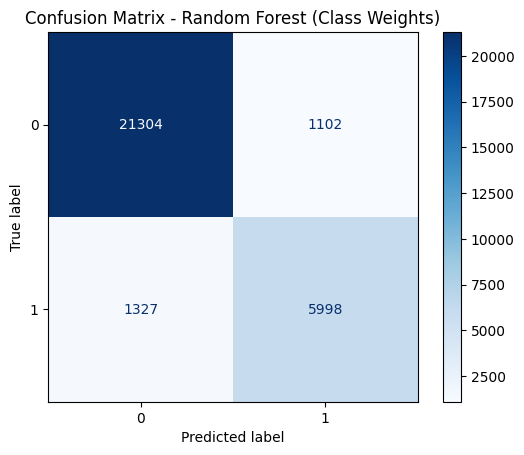

Random Forest (Class Weights) Metrics:
Accuracy: 0.9183
Precision: 0.8448
Recall: 0.8188
F1 Score: 0.8316
ROC-AUC Score: 0.9782


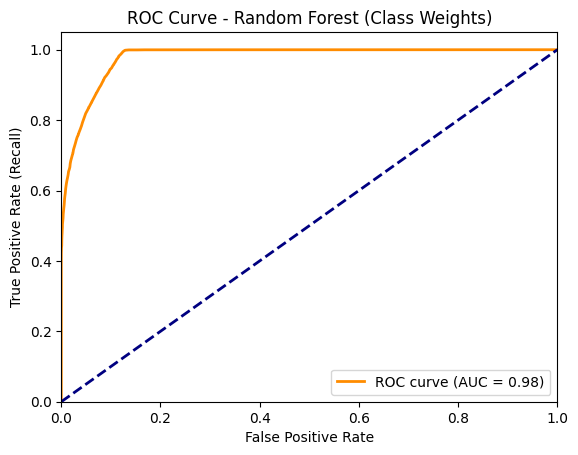

Random Forest (Class Weights) ROC-AUC Score: 0.98
Using SMOTE for class imbalance in Random Forest.


<Figure size 640x480 with 0 Axes>

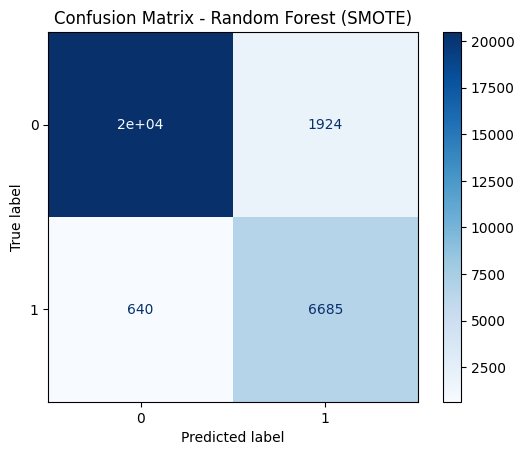

Random Forest (SMOTE) Metrics:
Accuracy: 0.9138
Precision: 0.7765
Recall: 0.9126
F1 Score: 0.8391
ROC-AUC Score: 0.9775


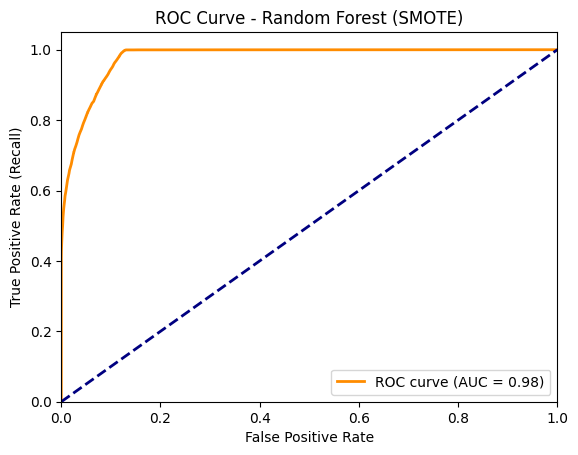

Random Forest (SMOTE) ROC-AUC Score: 0.98


In [6]:
model, y_pred, y_probs = train_random_forest(X_train, y_train, X_test, y_test, handle_imbalance=None)

model, y_pred, y_probs = train_random_forest(X_train, y_train, X_test, y_test, handle_imbalance='balanced')

model, y_pred, y_probs = train_random_forest(X_train, y_train, X_test, y_test, handle_imbalance='smote')
